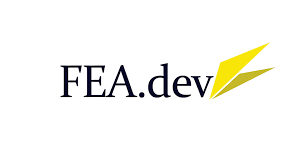

# <font color=white|cyan>Visualizando os impactos da Pandemia da COVID-19</font> 

# Artigo para Medium

Farei uma análise sobre os desdobramentos da pandemia da COVID-19, buscando entender o impacto social causado.
A principal hipótese é que a Pandemia foi subnotificada por um tempo e isso fez com que tivéssemos consequências piores. 
O recorte temporal será de 2020 até 2021.

# Importando os dados, bibliotecas, etc.

Primeiro vamos importar tudo que precisaremos.

In [26]:
# Para não aparecer as mensagens de warnings: 
import warnings
warnings.filterwarnings('ignore')

# Importando as bibliotecaS:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Nomeando os dados sobre o número de casos:
Casos = pd.read_csv('Documents/caso_full.csv', na_values ='n/a', usecols = [2, 15, 16])

# Nomeando os dados sobre o número de óbitos:
Óbitos = pd.read_csv('Documents/obito_cartorio.csv', na_values ='n/a', usecols=[0, 1, 5, 7, 10, 12, 14])

# Casos da Covid-19
Vamos limpar e visualizar todos os dados referentes aos casos da Covid-19.

In [27]:
# Visualizando um resumo do DataFrame:

Casos

,date,state,new_confirmed
0,2020-03-17,AC,3
1,2020-03-17,AC,3
2,2020-03-18,AC,0
3,2020-03-18,AC,0
4,2020-03-19,AC,1
...,...,...,...
3685163,2022-02-25,TO,0
3685164,2022-02-25,TO,0
3685165,2022-02-25,TO,0
3685166,2022-02-25,TO,0


Visualizando as primeiras linhas, pudemos perceber que talvez haja dados duplicados (como o dia 18/03/2020 que aparece duas vezes). Mais a frente cuidaremos disso.

In [28]:
# Pudemos perceber que há dados de 2022 também. Como o período da nossa análise é 2020-2021, vamos excluir os dados de 2022:

filtro = Casos['date'] < '2022-01-01'
Casos = Casos[filtro]

Casos

,date,state,new_confirmed
0,2020-03-17,AC,3
1,2020-03-17,AC,3
2,2020-03-18,AC,0
3,2020-03-18,AC,0
4,2020-03-19,AC,1
...,...,...,...
3677323,2021-12-31,TO,0
3677324,2021-12-31,TO,0
3677325,2021-12-31,TO,0
3677326,2021-12-31,TO,0


In [29]:
# Vamos visualizar as informações do DataFrame:

Casos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3370672 entries, 0 to 3677327
Data columns (total 3 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   new_confirmed  int64 
dtypes: int64(1), object(2)
memory usage: 102.9+ MB


Pudemos ver que há 3 colunas (data, state e new_confirmed) e que temos 3.370.672 linhas. 

Há bastante linhas porque temos todos os casos confirmados de Covid-19 por dia (de 17/03/2020 até 31/12/2021) para cada estado brasileiro.

In [30]:
# Como suspeitamos que há dados duplicados, vamos conferir para ver se há mesmo:

Duplicados_casos = Casos.duplicated()

Duplicados_casos

0          False
1           True
2          False
3           True
4          False
           ...  
3677323     True
3677324     True
3677325     True
3677326     True
3677327     True
Length: 3370672, dtype: bool

Já é possível ver que há alguns dados duplicados (aparece "True" nos dados duplicados).

In [31]:
# Visualizando os dados duplicados:

Casos[Duplicados_casos]

,date,state,new_confirmed
1,2020-03-17,AC,3
3,2020-03-18,AC,0
5,2020-03-19,AC,1
7,2020-03-20,AC,3
9,2020-03-21,AC,4
...,...,...,...
3677323,2021-12-31,TO,0
3677324,2021-12-31,TO,0
3677325,2021-12-31,TO,0
3677326,2021-12-31,TO,0


In [32]:
# Excluindo os dados duplicados:

Casos.drop_duplicates(inplace=True)

In [33]:
# Visualizando novamente as informações para ver como a quantidade de linhas diminiu com a exclusão dos dados duplicados:

Casos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371268 entries, 0 to 3677188
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           371268 non-null  object
 1   state          371268 non-null  object
 2   new_confirmed  371268 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 11.3+ MB


Pudemos perceber que agora temos 371.268 (antes tínhamos 3.365.056 linhas). Demos uma boa limpada.

In [34]:
# Vamos ver se há dados nulos no DataFrame e, caso tenha, vamos excluir:

Casos.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           date  state  new_confirmed
0        False  False          False
2        False  False          False
4        False  False          False
6        False  False          False
8        False  False          False
...        ...    ...            ...
3676907  False  False          False
3676908  False  False          False
3677047  False  False          False
3677048  False  False          False
3677188  False  False          False

[371268 rows x 3 columns]>

Como tivemos "False" em todas as linhas, não há dados nulos no DataFrame.

### Visualizando os dados tratados

In [35]:
Casos

,date,state,new_confirmed
0,2020-03-17,AC,3
2,2020-03-18,AC,0
4,2020-03-19,AC,1
6,2020-03-20,AC,3
8,2020-03-21,AC,4
...,...,...,...
3676907,2021-12-28,TO,376
3676908,2021-12-29,TO,0
3677047,2021-12-29,TO,218
3677048,2021-12-30,TO,0


In [36]:
# Vamos agrupar as linhas, para deixar todos os dados de cada estado em um linha só:

Casos_UF = Casos.groupby('state')[['date', 'new_confirmed']].sum()

Casos_UF

,new_confirmed
state,
AC,169895
AL,438758
AM,813521
AP,248987
BA,2063930
CE,1655372
DF,1039381
ES,1117508
GO,1706460


In [37]:
Casos_renomeado = Casos_UF.rename(columns={'state':'UF', 'new_confirmed':'Novos Casos Confirmados'})
Casos_renomeado_2 = Casos_renomeado.reindex(columns=['UF','Novos Casos Confirmados'])

Casos_renomeado_3 = Casos_renomeado_2.reset_index()

Casos_renomeado_4 = Casos_renomeado_3.rename(columns={'state':'UF'})
Casos_renomeado_4.set_index('UF')
Casos_UF = Casos_renomeado_4.dropna(axis=1)

Casos_UF

,UF,Novos Casos Confirmados
0,AC,169895
1,AL,438758
2,AM,813521
3,AP,248987
4,BA,2063930
5,CE,1655372
6,DF,1039381
7,ES,1117508
8,GO,1706460
9,MA,619536


### Análise do número de casos

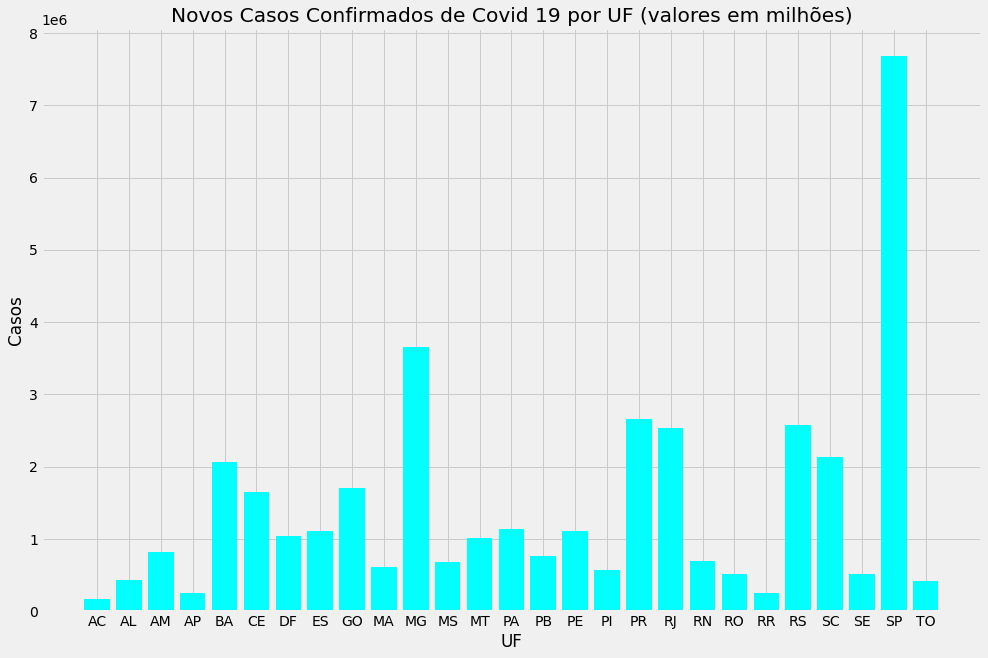

In [38]:
# Definindo as variáveis do gráfico:

Casos_x = Casos_UF['UF']
Casos_y = Casos_UF['Novos Casos Confirmados']

# Editando o gráfico:

plt.bar(Casos_x, Casos_y,  color = 'cyan')
plt.rcParams['figure.figsize'] = [30,10] #figsize=(largura,altura)
plt.style.use('fivethirtyeight')
plt.xlabel('UF')
plt.ylabel('Casos')
plt.title('Novos Casos Confirmados de Covid 19 por UF (valores em milhões)')

# Plotando o gráfico:

plt.show()

Pudemos notar que a unidade federativa que mais teve casos de Covid-19 foi São Paulo: a principal UF e o centro econômico do país. Tendo isso como base, podemos supor que a economia pôde ter sido grandemente prejudicada por conta disso, pois tivemos um período longo de lockdown em SP, o que pode ter reduzido muito a atividade econômica no principal polo econômico do país. Porém, não podemos dizer que a economia do país entrou em crise somente por causa de SP, pois a crise que afetou os demais estados também refletiu na economia como um todo, atenuando a crise.

In [44]:
Casos

,date,state,new_confirmed
0,2020-03-17,AC,3
2,2020-03-18,AC,0
4,2020-03-19,AC,1
6,2020-03-20,AC,3
8,2020-03-21,AC,4
...,...,...,...
3676907,2021-12-28,TO,376
3676908,2021-12-29,TO,0
3677047,2021-12-29,TO,218
3677048,2021-12-30,TO,0


# Óbitos por Covid-19

Vamos limpar e visualizar todos os dados referentes aos casos da Covid-19.

### Visualizando os dados do número de óbitos

In [15]:
# Visualizando um resumo do DataFrame:

Óbitos

,date,state,deaths_respiratory_failure_2019,deaths_pneumonia_2019,deaths_covid19,deaths_respiratory_failure_2020,deaths_pneumonia_2020
0,2020-01-01,AC,2,3,0,1,2
1,2020-01-02,AC,2,3,0,1,4
2,2020-01-03,AC,2,3,0,1,7
3,2020-01-04,AC,2,6,0,2,7
4,2020-01-05,AC,2,7,0,3,11
...,...,...,...,...,...,...,...
9877,2020-12-27,TO,450,889,864,421,747
9878,2020-12-28,TO,452,891,865,421,748
9879,2020-12-29,TO,452,895,865,421,748
9880,2020-12-30,TO,455,897,865,421,748


In [16]:
# Vamos ver se há dados duplicados, como na base de dados anterior:

Duplicados_óbitos = Óbitos.duplicated()

Duplicados_óbitos

0       False
1       False
2       False
3       False
4       False
        ...  
9877    False
9878    False
9879    False
9880    False
9881    False
Length: 9882, dtype: bool

Pudemos ver que não há dados duplicados, então não precisamos mexer aqui.

In [17]:
# Vamos visualizar as informações do DataFrame:

Óbitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9882 entries, 0 to 9881
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   date                             9882 non-null   object
 1   state                            9882 non-null   object
 2   deaths_respiratory_failure_2019  9882 non-null   int64 
 3   deaths_pneumonia_2019            9882 non-null   int64 
 4   deaths_covid19                   9882 non-null   int64 
 5   deaths_respiratory_failure_2020  9882 non-null   int64 
 6   deaths_pneumonia_2020            9882 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 540.5+ KB


Pudemos ver que há 8 colunas (date, state, deaths_respiratory_failure_2019, deaths_pneumonia_2019, deaths_covid19, deaths_respiratory_failure_2020, deaths_pneumonia_2020, new_deaths_respiratory_failure_2020) e 9882 linhas.

In [18]:
# Vamos ver se há dados nulos no DataFrame e, caso tenha, vamos excluir:
Óbitos.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        date  state  deaths_respiratory_failure_2019  deaths_pneumonia_2019  \
0     False  False                            False                  False   
1     False  False                            False                  False   
2     False  False                            False                  False   
3     False  False                            False                  False   
4     False  False                            False                  False   
...     ...    ...                              ...                    ...   
9877  False  False                            False                  False   
9878  False  False                            False                  False   
9879  False  False                            False                  False   
9880  False  False                            False                  False   
9881  False  False                            False                  False   

 

Como pudemos ver, aparece "True" em algumas linhas, isso que dizer que há valores nulos, então valor excluí-los.

In [19]:
# Para excluir:

Óbitos.dropna(inplace=True)

Óbitos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9882 entries, 0 to 9881
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   date                             9882 non-null   object
 1   state                            9882 non-null   object
 2   deaths_respiratory_failure_2019  9882 non-null   int64 
 3   deaths_pneumonia_2019            9882 non-null   int64 
 4   deaths_covid19                   9882 non-null   int64 
 5   deaths_respiratory_failure_2020  9882 non-null   int64 
 6   deaths_pneumonia_2020            9882 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 617.6+ KB


Tudo certo! Conseguimos excluir e agora temos 9.882 linhas.

### Visualizando os dados tratados

In [20]:
Óbitos

,date,state,deaths_respiratory_failure_2019,deaths_pneumonia_2019,deaths_covid19,deaths_respiratory_failure_2020,deaths_pneumonia_2020
0,2020-01-01,AC,2,3,0,1,2
1,2020-01-02,AC,2,3,0,1,4
2,2020-01-03,AC,2,3,0,1,7
3,2020-01-04,AC,2,6,0,2,7
4,2020-01-05,AC,2,7,0,3,11
...,...,...,...,...,...,...,...
9877,2020-12-27,TO,450,889,864,421,747
9878,2020-12-28,TO,452,891,865,421,748
9879,2020-12-29,TO,452,895,865,421,748
9880,2020-12-30,TO,455,897,865,421,748


In [21]:
# Vamos agrupar as linhas, para deixar todos os dados de cada estado em uma mesma lnha, assim como no DataFrame de casos:

Óbitos = Óbitos.groupby('state')[['date', 'deaths_respiratory_failure_2019', 'deaths_pneumonia_2019', 'deaths_covid19', 'deaths_respiratory_failure_2020', 'deaths_pneumonia_2020']].sum()

Óbitos

,deaths_respiratory_failure_2019,deaths_pneumonia_2019,deaths_covid19,deaths_respiratory_failure_2020,deaths_pneumonia_2020
state,,,,,
AC,42879,160954,128272,46412,132421
AL,286545,478329,409503,273979,394481
AM,123600,394030,499497,187604,492279
AP,43751,91520,140834,50959,61027
BA,1403498,1344188,1225750,1329956,1234848
CE,545649,1374208,1840282,585207,1204552
DF,181607,585313,540671,178470,531221
ES,256920,938407,719106,256171,755092
GO,586965,1237158,935456,619485,1107574


In [22]:
Óbitos_renomeado = Óbitos.rename(columns={'state':'UF','deaths_respiratory_failure_2019': 'Mortes por Insuficiência Respiratória em 2019', 'deaths_pneumonia_2019':'Mortes por Pneumonia em 2019', 'deaths_covid19':'Mortes por Covid19', 'deaths_respiratory_failure_2020':'Mortes por Insuficiência Respiratória em 2020','deaths_pneumonia_2020':'Mortes por Pneumonia em 2020',})
Óbitos_renomeado_2 =Óbitos_renomeado.reindex(columns=['Mortes por Covid19', 'Mortes por Pneumonia em 2019', 'Mortes por Pneumonia em 2020', 'Mortes por Insuficiência Respiratória em 2019', 'Mortes por Insuficiência Respiratória em 2020'])

Óbitos_renomeado_3 = Óbitos_renomeado_2.reset_index()

Óbitos_renomeado_4 = Óbitos_renomeado_3.rename(columns={'state':'UF'})
Óbitos_renomeado_4.set_index('UF')
Óbitos = Óbitos_renomeado_4.dropna(axis=1)

Óbitos

,UF,Mortes por Covid19,Mortes por Pneumonia em 2019,Mortes por Pneumonia em 2020,Mortes por Insuficiência Respiratória em 2019,Mortes por Insuficiência Respiratória em 2020
0,AC,128272,160954,132421,42879,46412
1,AL,409503,478329,394481,286545,273979
2,AM,499497,394030,492279,123600,187604
3,AP,140834,91520,61027,43751,50959
4,BA,1225750,1344188,1234848,1403498,1329956
5,CE,1840282,1374208,1204552,545649,585207
6,DF,540671,585313,531221,181607,178470
7,ES,719106,938407,755092,256920,256171
8,GO,935456,1237158,1107574,586965,619485
9,MA,507554,480981,477284,338576,451065


### Análise do número de óbitos

In [ ]:
# Definindo as variáveis do gráfico:

Mortes_por_Covid19 = Óbitos['Mortes por Covid19']
Mortes_por_Pneumonia_em_2019 = Óbitos['Mortes por Pneumonia em 2019']
Mortes_por_Pneumonia_em_2020 = Óbitos['Mortes por Pneumonia em 2020']
Mortes_por_insuficiência_respiratória_em_2019 = Óbitos['Mortes por Insuficiência Respiratória em 2019']
Mortes_por_insuficiência_respiratória_em_2020 = Óbitos['Mortes por Insuficiência Respiratória em 2020']
Óbitos_x = Óbitos['UF']

# Alterando o tamanho do gráfico. Sempre tem que ser feito antes de passar as variáveis:

plt.rcParams['figure.figsize'] = [15,10] #figsize=(largura,altura)
plt.style.use('fivethirtyeight')

# Passando as variáveis que aparecerão no gráfico:

plt.plot(Óbitos_x,Mortes_por_Covid19,label="Mortes por Covid19")
plt.plot(Óbitos_x,Mortes_por_Pneumonia_em_2019,label="Mortes por Pneumonia em 2019")
plt.plot(Óbitos_x,Mortes_por_Pneumonia_em_2020,label="Mortes por Pneumonia em 2020")
plt.plot(Óbitos_x,Mortes_por_insuficiência_respiratória_em_2019,label="Mortes por Insuficiência Respiratória em 2019")
plt.plot(Óbitos_x,Mortes_por_insuficiência_respiratória_em_2020,label="Mortes por Insuficiência Respiratória em 2020")

# Editando o gráfico:
plt.title("Número de óbitos por Covid19 e outras doenças",fontsize=15)
plt.xlabel("UF",fontsize=13)
plt.ylabel("Mortes",fontsize=13)
plt.legend()

# Plotando o gráfico:
plt.show()

Ao olharmos o gráfico acima, pudemos perceber que o número de mortes por Pneumonia e Insuficiência respiratória cresceu muito 2019, justamente quando a Covid-19 começou a se espalhar pelo mundo, mas ainda não sabíamos que ela já estava presente em nosso país. Especialistas apontam que essas mortes podem ter sido, sim, em decorrência da Covid-19, mas não houve contatação, pois ainda não havíamos tido nenhum caso notificado. Em 2020, o número de pessoas que morreram por Insuficiência respiratória caiu, enquanto o número de mortes por Covid-19 subiu. Uma hipótese que pode ser levantada é a de que os casos de morte por Covid-19 deixaram de ser subnotificados e começaram a, de fato, se enquadrar a onde deveria (e não em outras doenças, por exemplo).

# Agora partiremos para a análise

Agora que já temos todos os dados, vamos começar a plotar os gráficos para vermos como a Pandemia da COVID-19 evoluiu.

### Unindo casos e óbitos

Até aqui os dados foram tratados de maneira separada, mas agora os uniremos para fazermos a análise em conjunto para conseguirmos ver, por meio de correlações, como que eles se relacionaram.

In [24]:
# Unindo:
Casos_e_óbitos = pd.concat([Casos['Novos Casos Confirmados'], Óbitos], axis=1, join='outer')

# Alterando a ordem das colunas:
Casos_e_óbitos_2 = Casos_e_óbitos.reindex(columns=['UF', 'Novos Casos Confirmados', 'Mortes por Covid19', 'Mortes por Pneumonia em 2019', 'Mortes por Pneumonia em 2020', 'Mortes por Insuficiência Respiratória em 2019', 'Mortes por Insuficiência Respiratória em 2020'])

Casos_e_óbitos = Casos_e_óbitos_2

Casos_e_óbitos

,UF,Novos Casos Confirmados,Mortes por Covid19,Mortes por Pneumonia em 2019,Mortes por Pneumonia em 2020,Mortes por Insuficiência Respiratória em 2019,Mortes por Insuficiência Respiratória em 2020
0,AC,169895,128272,160954,132421,42879,46412
1,AL,438758,409503,478329,394481,286545,273979
2,AM,813521,499497,394030,492279,123600,187604
3,AP,248987,140834,91520,61027,43751,50959
4,BA,2063930,1225750,1344188,1234848,1403498,1329956
5,CE,1655372,1840282,1374208,1204552,545649,585207
6,DF,1039381,540671,585313,531221,181607,178470
7,ES,1117508,719106,938407,755092,256920,256171
8,GO,1706460,935456,1237158,1107574,586965,619485
9,MA,619536,507554,480981,477284,338576,451065


### Análise de Correlação

Vamos fazer uma análise de correlação com o número de casos e as variáveis de óbitos para vermos quão correlacionados eles são.

<AxesSubplot:>

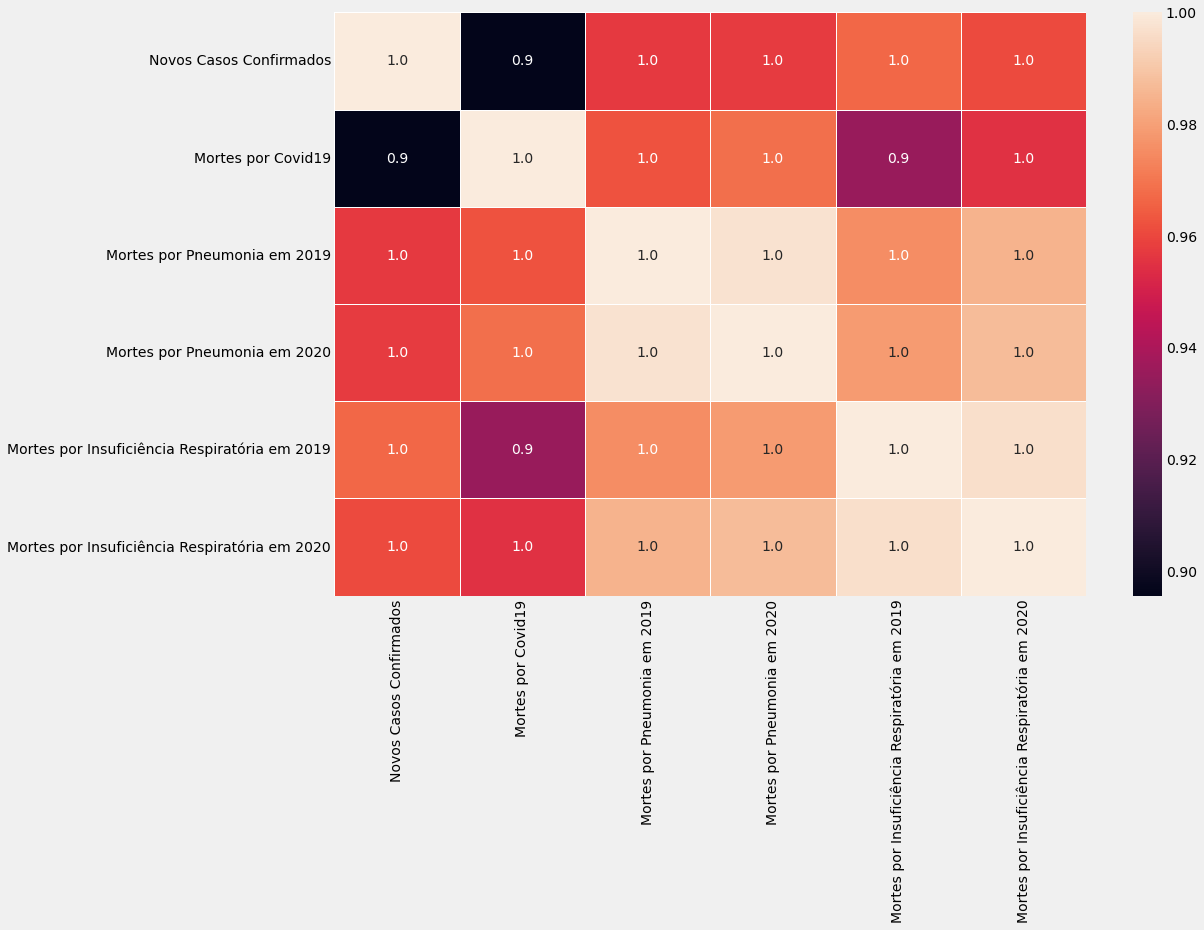

In [25]:
Correlação = Casos_e_óbitos.corr()

Mapa_de_Correlação = sns.heatmap(Correlação, annot = True, fmt=".1f", linewidths=.6)

Mapa_de_Correlação

A partir da análise do Mapa de Correlação, nós pudemos perceber que, de fato, a hipótese que levantamos no começo que as mortes por Covid-19 podem ter sido tratadas como sendo de outras doenças, dificultando a real percepção pelas autoridades que a Covid19 já estava em nosso, causando retartamento das medidas necessárias.
Por exemplo, ao olharmos a correlação entre Mortes por Covid-19 e Mortes por Insuficiência Respiratória em 2019 notamos que é de 1, ou seja, há uma correlação muito forte. Isso que dizer que elas evoluíram de maneira parecida o que nos induz a pensar que as pessoas possam ter ido ao hospital com a Covid19, mas como os sintomas são bem parecidos e ainda não haviam testes, não havia como saber que as mortes eram por Covid19. 
Outro ponto que corrobora com a nossa hipótese é que depois que os testes começaram a ser feitos, as mortes por outras doenças (como Insuficiência Respiratória) começam a cair, enquanto as mortes por Covid19 começam a subir. Será muita coincidência? Provavelmente não. Isso pode ser notado no gráfico que mostra os óbitos.